In [1]:
rm(list = ls())
#getwd()
setwd("/Users/Lingyi/TAD/FinalProject")
set.seed(8888)

In [3]:
libraries <- c("geometry","rsvd","ggraph","Rtsne","lubridate","tidyverse","stringr","stm","quanteda.corpora",
               "quanteda","lsa","NLP","tm","RTextTools","tidytext","topicmodels",
               "ldatuning","stringi","ggplot2","proxy","bursts","readtext","plotly","widyr","igraph")
lapply(libraries, require, character.only=TRUE)

Loading required package: geometry
Loading required package: magic
Loading required package: abind
Loading required package: rsvd
Loading required package: Rtsne
Loading required package: lubridate
Warning message:
“package ‘lubridate’ was built under R version 3.4.4”
Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date

Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  1.4.2     ✔ purrr   0.2.4
✔ tidyr   0.8.0     ✔ dplyr   0.7.4
✔ readr   1.1.1     ✔ stringr 1.3.0
✔ tibble  1.4.2     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ lubridate::setdiff()     masks base::setdiff()


[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

[[15]]
[1] TRUE

[[16]]
[1] TRUE

[[17]]
[1] TRUE

[[18]]
[1] TRUE

[[19]]
[1] TRUE

[[20]]
[1] TRUE

[[21]]
[1] TRUE

[[22]]
[1] TRUE

[[23]]
[1] TRUE

[[24]]
[1] TRUE

[[25]]
[1] TRUE

In [4]:
df <- read_csv("complete_tillMay1.csv")
head(df, n=5)

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  X1 = col_integer(),
  content = col_character(),
  date = col_character(),
  rating = col_integer()
)
Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”Warning

X1,content,date,rating
0,"What can be said, that hasn't already been said about the President?Nothing in this book will surprise anyone who has been following the trials and tribulations of the 45th President of the United States, Donald J. Trump. His supporters will cry foul, and say some of it isn't true -- and some of it might not be -- but if even 10% of what is in this book is true, holy crap!Reading this book is like being forced to eat an entire 5 gallon carton of ice cream in one sitting. It is yummy and you don't want to stop. And then you do want to stop but you can't, because the book has you roped in. You should feel good, but in reality you feel awful, because of what you just did to yourself.So tread lightly, dear reader. You won't want to put the book down, but you won't be better off for reading it, either. If you don't like it, do something productive -- stop eating the ice cream and get off the couch. Make America AMERICA again!",January-5-2018,5
1,I got the kindle version this morning. I probably would not have bought this. I will probably see most of this book for free as the media tears into it over the next few weeks. My decision to purchase was based solely on Trump's furious efforts to keep it from coming out. It was well worth 15$ to do my part to keep this at the top of the best-sellers list.,January-5-2018,5
2,"I am not a phony billionaire. I am a genuine hourly worker who can afford $15 to show Trump that he can't order a book out of publication in America. Also, I'm a voter.",January-5-2018,5
3,"Dear. Mr. Wolff, please write another, this one much more informative. Pretend it<89>۪s fiction, but we will know.",February-11-2018,5
4,"I like the book, and it coincides with Trump<89>۪s twitter timeline. So if you have been following that, then you are in the know.However, and it could be just me....I felt like it was a book about Bannon?That being said, I cannot wait for part II! (There<89>۪s going to be a part II, right? - LOL)",January-16-2018,5


In [5]:
df <- mutate(df, date = mdy(date))

rating <- df$rating
freq_table <- as.data.frame(table(rating))
freq_table[with(freq_table, order(Freq)), ]

Warning message:
“package ‘bindrcpp’ was built under R version 3.4.4”

,rating,Freq
2,2,341
1,1,569
3,3,949
4,4,1381
5,5,4860


In [6]:
date <- df$date
freq_table <- as.data.frame(table(date))
dateDistribution <- freq_table[with(freq_table, order(Freq)), ]

x <- dateDistribution$date
y <- dateDistribution$Freq
p <- plot_ly(x = ~x, y = ~y, mode = 'lines', text = paste(y, "reviews")) %>%
    layout(title = 'Date Distribution', xaxis = list(autotick = F, dtick = 12))
p

No trace type specified:
  Based on info supplied, a 'bar' trace seems appropriate.
  Read more about this trace type -> https://plot.ly/r/reference/#bar
Warning message:
“'bar' objects don't have these attributes: 'mode'
Valid attributes include:
'type', 'visible', 'showlegend', 'legendgroup', 'opacity', 'name', 'uid', 'ids', 'customdata', 'hoverinfo', 'hoverlabel', 'stream', 'x', 'x0', 'dx', 'y', 'y0', 'dy', 'text', 'hovertext', 'textposition', 'textfont', 'insidetextfont', 'outsidetextfont', 'orientation', 'base', 'offset', 'width', 'marker', 'r', 't', 'error_y', 'error_x', '_deprecated', 'xaxis', 'yaxis', 'xcalendar', 'ycalendar', 'idssrc', 'customdatasrc', 'hoverinfosrc', 'xsrc', 'ysrc', 'textsrc', 'hovertextsrc', 'textpositionsrc', 'basesrc', 'offsetsrc', 'widthsrc', 'rsrc', 'tsrc', 'key', 'set', 'frame', 'transforms', '_isNestedKey', '_isSimpleKey', '_isGraticule'
”

HTML widgets cannot be represented in plain text (need html)

In [48]:
token_content <- df %>%
      unnest_tokens(word, content) %>%
      anti_join(stop_words) %>%
      mutate(word = tolower(word))
head(token_content)

Joining, by = "word"


X1,date,rating,word
0,2018-01-05,5,president
0,2018-01-05,5,book
0,2018-01-05,5,surprise
0,2018-01-05,5,trials
0,2018-01-05,5,tribulations
0,2018-01-05,5,45th


In [49]:
token_content %>% count(word, sort = TRUE) %>% head()

word,n
book,5755
trump,3353
read,3102
white,1435
house,1421
president,1050


In [50]:
content_word_pairs <- token_content %>%
    pairwise_count(word, X1, sort = TRUE, upper = FALSE)
head(content_word_pairs)

item1,item2,n
book,read,1343
book,trump,1331
white,house,1201
trump,read,829
book,white,727
book,house,719


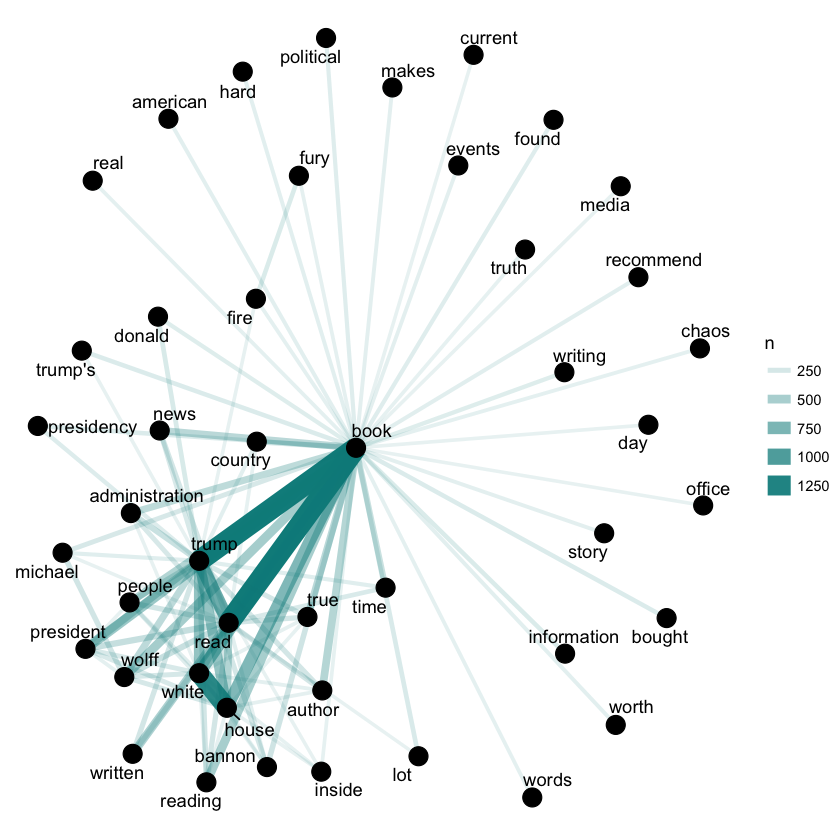

In [27]:
content_word_pairs %>%
      filter(n >= 150) %>%
      graph_from_data_frame() %>%
      ggraph(layout = "fr") +
      geom_edge_link(aes(edge_alpha = n, edge_width = n), edge_colour = "cyan4") +
      geom_node_point(size = 5) +
geom_node_text(aes(label = name), repel = TRUE, point.padding = unit(0.2, "lines")) +
      theme_void()

In [40]:
cont_tf_idf <- token_content %>% 
    count(X1, word, sort = TRUE) %>% 
    ungroup() %>%
    bind_tf_idf(word, X1, n)
cont_tf_idf

X1,word,n,tf,idf,tf_idf
2418,trump,43,0.06729264,1.3186510,0.08873551
7424,trump,40,0.05340454,1.3186510,0.07042195
6604,trump,22,0.05759162,1.3186510,0.07594325
7424,bannon,22,0.02937250,2.9806438,0.08754895
6894,book,16,0.07239819,0.7746568,0.05608375
1037,trump,15,0.05119454,1.3186510,0.06750773
7425,book,15,0.04807692,0.7746568,0.03724312
1053,book,14,0.08235294,0.7746568,0.06379527
1128,trump,14,0.05343511,1.3186510,0.07046227
1689,book,14,0.08860759,0.7746568,0.06864048


In [42]:
cont_tf_idf %>%
  arrange(-tf_idf) %>%
  select(-X1) %>%
  filter(!near(tf, 1))

word,n,tf,idf,tf_idf
ole,2,0.6666667,8.982059,5.988039
hahaha,2,0.6666667,7.595764,5.063843
scarily,1,0.5000000,8.982059,4.491029
excellant,1,0.5000000,8.982059,4.491029
intertaining,1,0.5000000,8.982059,4.491029
morecdepth,1,0.5000000,8.982059,4.491029
ohhh,1,0.5000000,8.982059,4.491029
putin's,1,0.5000000,8.982059,4.491029
wov,1,0.5000000,8.982059,4.491029
cue,1,0.5000000,8.982059,4.491029


In [56]:
word_counts <- df %>%
      unnest_tokens(word, content) %>%
      anti_join(stop_words) %>% 
      count(X1, word, sort = TRUE) %>% 
      ungroup()
head(word_counts)

Joining, by = "word"


X1,word,n
2418,trump,43
7424,trump,40
6604,trump,22
7424,bannon,22
6894,book,16
1037,trump,15


In [57]:
desc_dtm <- word_counts %>%
      cast_dtm(X1, word, n)
desc_dtm

<<DocumentTermMatrix (documents: 7959, terms: 15867)>>
Non-/sparse entries: 120582/126164871
Sparsity           : 100%
Maximal term length: NA
Weighting          : term frequency (tf)

In [58]:
desc_lda <- LDA(desc_dtm, k = 24, control = list(seed = 1234))
desc_lda

A LDA_VEM topic model with 24 topics.

In [59]:
tidy_lda <- tidy(desc_lda)

In [64]:
top_terms <- tidy_lda %>%
      group_by(topic) %>%
      top_n(6, beta) %>%
      ungroup() %>%
      arrange(topic, -beta)
top_terms

topic,term,beta
1,book,0.09611266
1,day,0.04615605
1,feel,0.03879707
1,scary,0.03650440
1,surprised,0.02170919
1,1,0.01727485
2,trump's,0.05015459
2,trump,0.03780163
2,book,0.02897634
2,detail,0.01269426


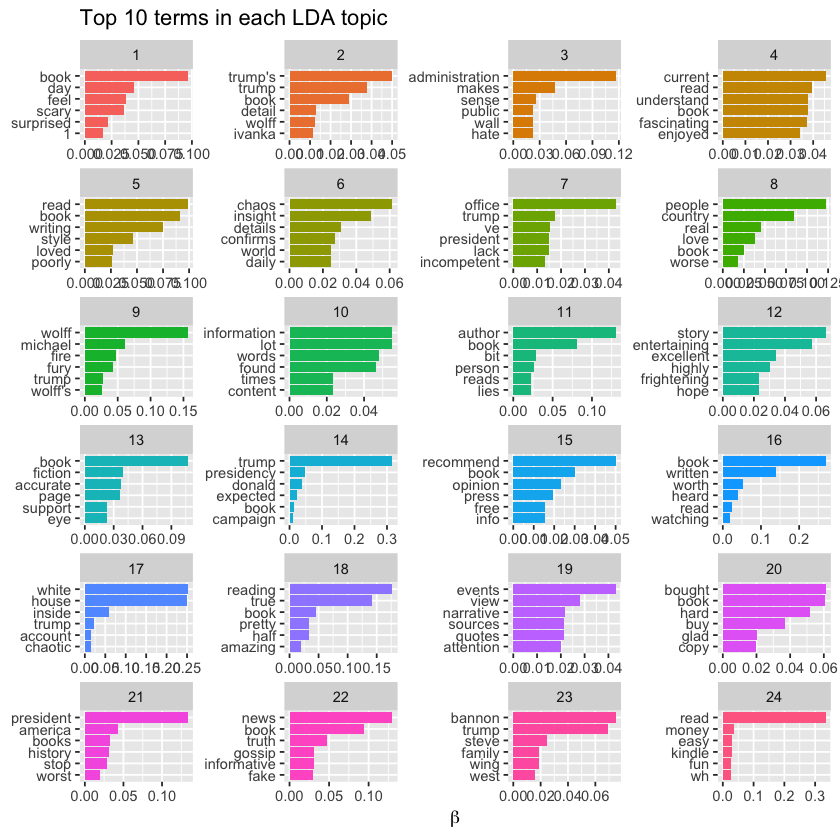

In [65]:
top_terms %>%
      mutate(term = reorder(term, beta)) %>%
      group_by(topic, term) %>%
      arrange(desc(beta)) %>%
      ungroup() %>%
      mutate(term = factor(paste(term, topic, sep = "__"),
                           levels = rev(paste(term, topic, sep = "__")))) %>%
      ggplot(aes(term, beta, fill = as.factor(topic))) +
      geom_col(show.legend = FALSE) +
      coord_flip() +
      scale_x_discrete(labels = function(x) gsub("__.+$", "", x)) + labs(title = "Top 10 terms in each LDA topic",
      x = NULL, y = expression(beta)) + facet_wrap(~ topic, ncol = 4, scales = "free")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


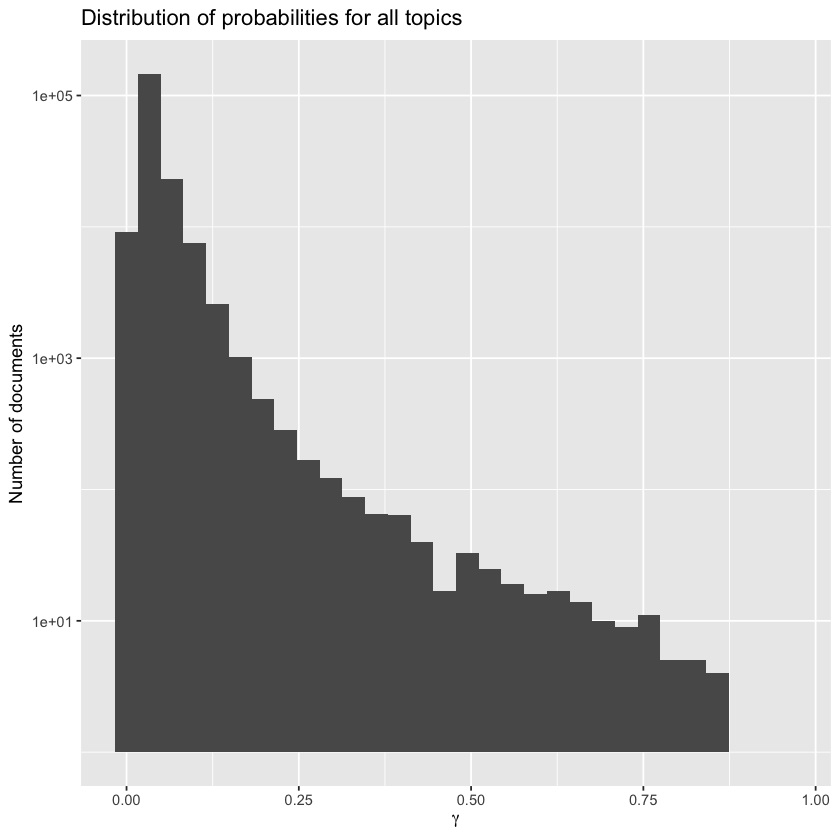

In [66]:
lda_gamma <- tidy(desc_lda, matrix = "gamma")
ggplot(lda_gamma, aes(gamma)) +
      geom_histogram() +
      scale_y_log10() +
      labs(title = "Distribution of probabilities for all topics",
           y = "Number of documents", x = expression(gamma))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 270 rows containing missing values (geom_bar).”

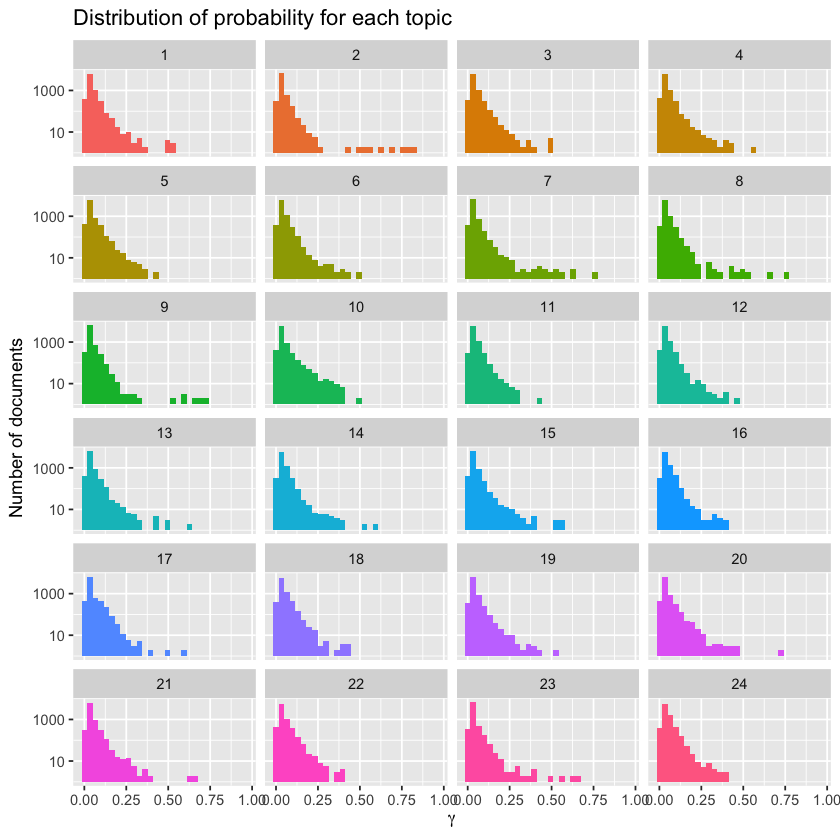

In [67]:
ggplot(lda_gamma, aes(gamma, fill = as.factor(topic))) + geom_histogram(show.legend = FALSE) +
facet_wrap(~ topic, ncol = 4) +
scale_y_log10() +
      labs(title = "Distribution of probability for each topic",
           y = "Number of documents", x = expression(gamma))